# Decision Tree ML technique for Smoking Data 

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')

In [2]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [4]:
df.shape

(1338, 6)

In [5]:
df.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

# Label Encoding for the data

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
df.region=le.fit_transform(df['region'])
df.sex=le.fit_transform(df['sex'])
df.smoker=le.fit_transform(df['smoker'])

df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [10]:
df.region.unique()

array([3, 2, 1, 0])

In [11]:
df.sex.unique()

array([0, 1])

In [12]:
#southwest = 3', 'southeast =2', 'northwest=1', 'northeast=0
# female = 0, male=1


x = df.drop('smoker',axis=1)
y = df.smoker

In [13]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Spliting the dataset for train and test

In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70, random_state=280)

In [15]:
xtrain.shape

(936, 5)

In [16]:
xtest.shape

(402, 5)

# Training ML Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Plot a decision tree diagram

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(274.5152447455752, 640.24, 'sex <= 0.5\ngini = 0.336\nsamples = 936\nvalue = [736, 200]'),
 Text(115.7383750790139, 616.08, 'bmi <= 22.995\ngini = 0.304\nsamples = 455\nvalue = [370, 85]'),
 Text(36.6826801517067, 591.9200000000001, 'children <= 1.5\ngini = 0.473\nsamples = 47\nvalue = [29, 18]'),
 Text(19.75221238938053, 567.76, 'bmi <= 20.045\ngini = 0.415\nsamples = 34\nvalue = [24, 10]'),
 Text(16.93046776232617, 543.6, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(22.573957016434893, 543.6, 'bmi <= 21.898\ngini = 0.473\nsamples = 26\nvalue = [16, 10]'),
 Text(11.286978508217446, 519.44, 'region <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(5.643489254108723, 495.2800000000001, 'age <= 35.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(2.8217446270543616, 471.12000000000006, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(8.465233881163085, 471.12000000000006, 'age <= 42.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.643489254108723, 446.96000

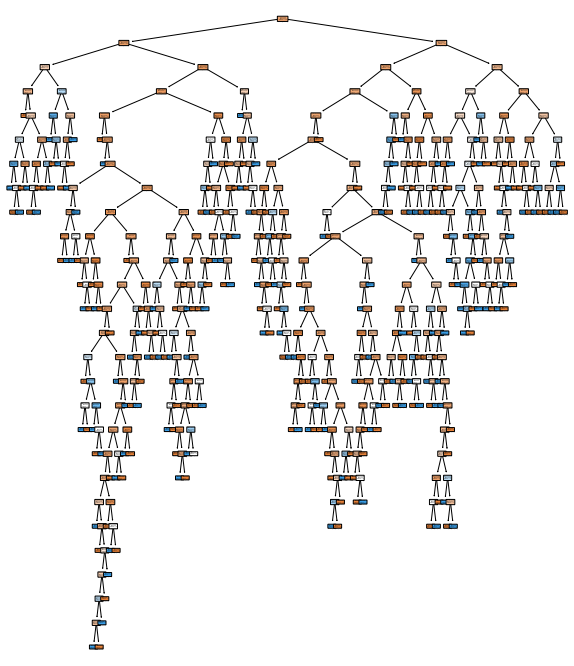

In [30]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

# Prediction for testing dataset

In [20]:
pred= clf.predict(xtest)

In [21]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
clf.predict([[3,19,0,27.900,0]]) # yes=1

array([1])

In [23]:
clf.predict([[1,32,1,28.880,0]])# no = 0

array([0])

# Finding Mean Square error and Mean Absolute error

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred)
mse

0.3681592039800995

In [25]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mse

0.3681592039800995

# Finding accuracy

In [28]:
clf.score(xtrain, ytrain)

0.9989316239316239

In [29]:
clf.score(xtest, ytest)

0.6318407960199005